# 1D resistivity forward modelling
[<!-- module-fieldgp badge --><span class="module module-fieldgp">Field Geophysics</span>](module-fieldgp) [<!-- module-appgp badge --><span class="module module-appgp">Applied Geophysics</span>](module-appgp) 
```{index} 1D resistivity forward modelling
```

This notebook allows for the forward modelling of 1D resistivity data based of a chosen input model. Modify the model parameters to reduce the error between our modelled resistivity and our field data. Different models can explain the same data, however the simpler model is commonly preferred. Unless there is alternative data to justify the more complex model.

In [1]:
#import required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

## Enter field data
Change the below list to match field data.

In [2]:
# AB/2 (m)
pos_field = [1.0,1.5,2.5,4.0,6.0,8.0,10.0,12.0,15.0,20.0,25.0,30.0,35.0,40.0,50.0,60.0,75.0,100.0,125.0,150.0,175.0,200.0,250.0,300.0,400.0,450.0,500.0,600.0]

# resistivity (ohm m)
res_field = [12.1,12.8,15.5,22.0,30.0,40.0,50.0,55.0,65.0,80.0,85.0,90.0,85.0,85.1,80.0,75.0,68.0,53.0,42.7,39.0,37.0,36.0,40.0,41.0,45.0,49.0,55.0,57.0]

## Enter model parameters

Change the below lists to modify the model. The script takes any number of layers.

In [3]:
## enter model parameters
layer_no = 8
depth_mdl = [1.75,5.00,8.50,18.00,64.00,200.00,320.00,1000.00]  #layer affected
res_mdl = [11.00,650.00,17.00,200.00,9.00,320.00,5.00,70.00]   #layer affected


## Model generation
run all the cells below to process the input parameters and generate the final resistivity result. A complete curve matching method derived from the Bessel functions is used. This expression is suitable for solving any number of layers. Note that there is a large number of theoretical models that will fit the field data. Theoretical model obtained from reference 1.

In [4]:
#calculate layer thickness
lyr_thickness = [depth_mdl[0]]    #layer affected

for i in range(len(depth_mdl)):    #layer affected
    try:
        lyr_thickness.append(depth_mdl[i+1]-depth_mdl[i])    #layer affected
    except:
        break

#required data lists
L = np.linspace(-14,23,23+14+1)

I = []
for i in L: I.append(10**(i/6) / 1.14)  

absica = np.linspace(0,14+23,14+23+1)

K = [-0.000318,0.002072,-0.004978,0.01125,-0.02521,0.05812,-0.1436,0.393,-1.1324,2.7044,-3.4507,0.4248,1.1817,0.6194,0.2374,0.08688,0.0235,0.01284,-0.001198,0.003042]

#transform data
Transform = []  
length = len(lyr_thickness)    #layer affected

for j in I:
    results = [None]*length
    for i in range(length)[::-1]: 
        if lyr_thickness[i] == lyr_thickness[-1]:    #layer affected
            results [i] = res_mdl[i]
        else:
            results [i] = (results[i+1] + res_mdl[i] * ((2/(1+np.exp(-2*lyr_thickness[i]/j)))-1)) / (1 + results[i+1]  * ((2/(1+np.exp(-2*lyr_thickness[i]/j)))-1)/ res_mdl[i])
    Transform.append(results)

In [5]:
#Apply lineal filters from O'Neil   #??is this the correct naming??
Transform = np.array(Transform)   

Lineal_Filters = []  #is this the correct naming?""

c = 0
for i in K:
    results = [None]*19
    for j in range(19):
        results [j] = i* Transform[j+c,0]
    c += 1
    Lineal_Filters.append(results)

In [6]:
#sum all columns
Lineal_Filters = np.array(Lineal_Filters)
res= []

for i in range(len(Lineal_Filters[0])):
    res.append(np.sum(Lineal_Filters[:,i]))

In [7]:
depth = [1]
for i in range(len(res)-1):
    depth.append(depth[i]*10**(1/6))

## Calculate RMS

In [8]:
#interpolate results at interval of field data
f = interpolate.interp1d(depth,res)
res_interp = f(pos_field)

#find RMS
res_interp= np.array(res_interp)
res_field= np.array(res_field)
RMS = np.sqrt(np.sum((res_field-res_interp)**2))

## Plot results

In [9]:
#create earth layers plot
box_res = []
for i in res_mdl: box_res.append(i),box_res.append(i)   #layer affected

box_depth = [0]
for i in depth_mdl:
        box_depth.append(i), box_depth.append(i)      #layer affected
box_depth = box_depth[:-1]

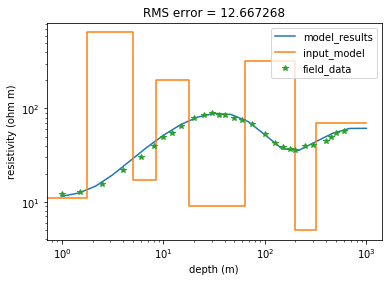

In [10]:
plt.figure()
plt.xlabel("depth (m)"), plt.ylabel("resistivity (ohm m)")
plt.xscale('log'), plt.yscale('log')
plt.plot (depth, res,label="model_results")
plt.plot (box_depth,box_res,label="input_model")
plt.plot (pos_field,res_field,'*',label="field_data")
plt.legend(loc="upper right")

plt.title ('RMS error = %2f'%RMS)
plt.show ()

You could generate a loop to test a variety of models and save the best fit models to memory.

## References

1. Molano, C., 2020. Carlosmolanowebsite. [online] Sites.google.com. Available at: <https://sites.google.com/a/hidrogeocol.com.co/carlos_molano/Home> [Accessed 26 June 2020]. 
2. Telford, WM, Geldart, LP, & Sheriff, RE 1990, Applied Geophysics, Cambridge University Press, Cambridge. Available from: ProQuest Ebook Central. [26 June 2020].